# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [15]:
import pandas as pd

In [16]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [17]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [18]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv')
df_seoul_business = pd.read_csv('df_seoul_business.csv')
df_seoul_people = pd.read_csv('df_seoul_people.csv')

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504


In [20]:
df_seoul_moving.head(3)

,도착 시군구 코드,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),이동인구(합)
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87


In [21]:
df_seoul_business.head(3)

,자치구,커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수
0,강남구,1624,7273,6508
1,강동구,546,1660,1990
2,강북구,358,1095,867


In [22]:
df_seoul_people.head(3)

,자치구,세대,인구합계
0,종로구,73766.0,153684.0
1,중구,63767.0,131450.0
2,용산구,111207.0,236518.0


In [23]:
data = pd.merge(standard, df_seoul_bus_station, on='자치구')
data = pd.merge(data, df_seoul_moving, on='도착 시군구 코드')
data = pd.merge(data, df_seoul_business, on='자치구')
data = pd.merge(data, df_seoul_people, on='자치구')

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head(3)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),이동인구(합),커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수,세대,인구합계
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,948,3613,889,73766.0,153684.0
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,869,3542,1152,63767.0,131450.0
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,8514380,14707082.87,634,2076,1214,111207.0,236518.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   정류장수               25 non-null     int64  
 3   노선수                25 non-null     int64  
 4   승차총승객수             25 non-null     int64  
 5   하차총승객수             25 non-null     int64  
 6   승차평균승객수            25 non-null     float64
 7   하차평균승객수            25 non-null     float64
 8   평균 이동 시간(분)        25 non-null     float64
 9   이동인구(평균)           25 non-null     float64
 10  이동 시간 합계(분)        25 non-null     int64  
 11  이동인구(합)            25 non-null     float64
 12  커피전문점 사업체수         25 non-null     int64  
 13  커피전문점 종업자수         25 non-null     int64  
 14  부동산 중개 및 대리업 종업자수  25 non-null     int64  
 15  세대                 25 non-null     float64
 16  인구합계               25 non-nu

In [26]:
df = data.drop('도착 시군구 코드', axis=1)

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
    - 인구합계와 정류장 수는 관련이 있다.

* 가설 2
    - 평균 이동시간과 노선수는 관련이 있다.

* 가설 3
    - 커피전문점 사업체 수와 노선수는 관련이 있다.

In [27]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

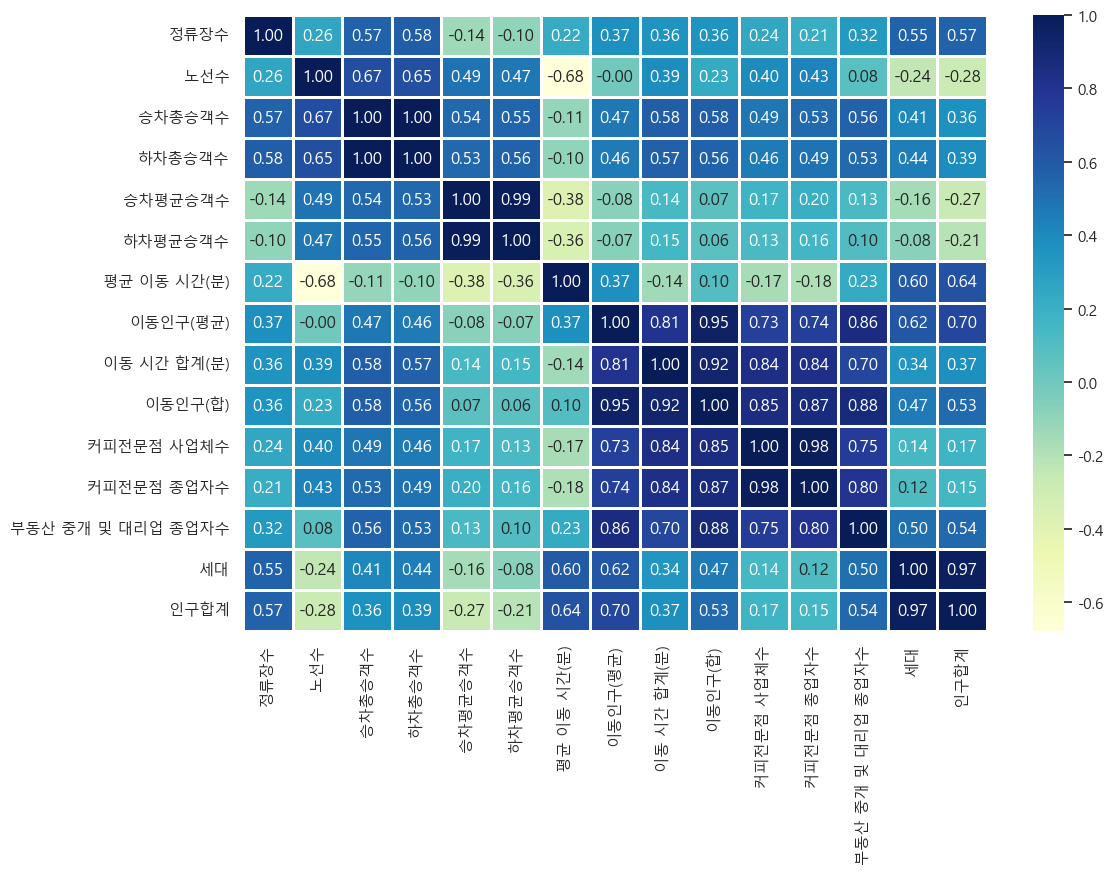

In [31]:
corr = df.corr()

plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap="YlGnBu", fmt='.2f')
plt.show()

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

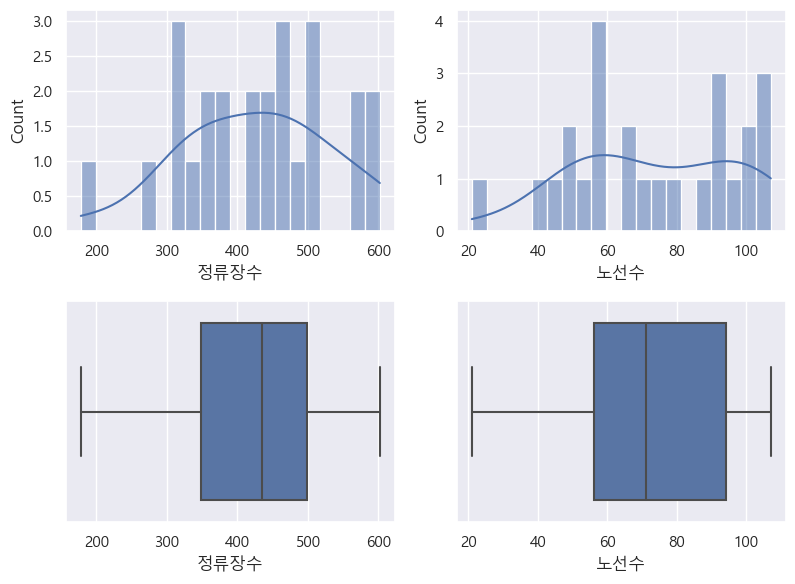

In [38]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['정류장수'], kde=True, bins=20)

plt.subplot(2, 2, 2)
sns.histplot(df['노선수'], kde=True, bins=20)

plt.subplot(2, 2, 3)
sns.boxplot(x=df['정류장수'])

plt.subplot(2, 2, 4)
sns.boxplot(x=df['노선수'])


plt.tight_layout()
plt.show()

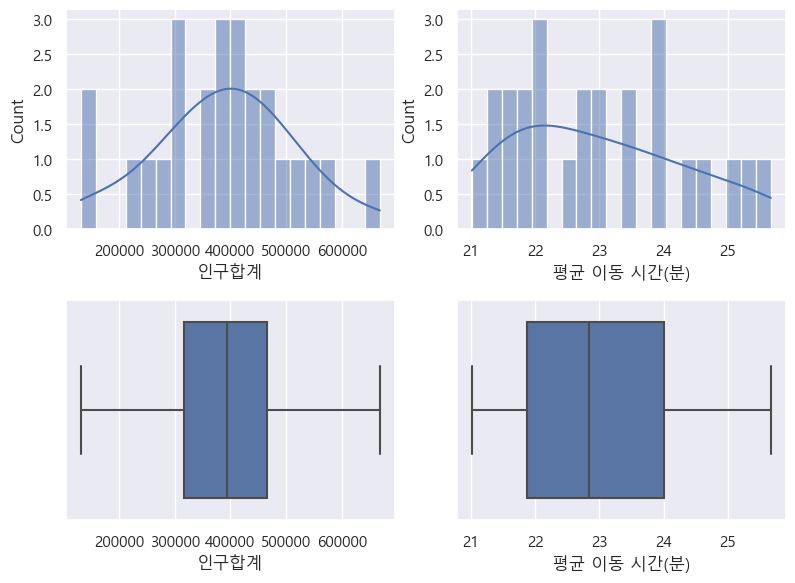

In [101]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['인구합계'], kde=True, bins=20)

plt.subplot(2, 2, 2)
sns.histplot(df['평균 이동 시간(분)'], kde=True, bins=20)

plt.subplot(2, 2, 3)
sns.boxplot(x=df['인구합계'])

plt.subplot(2, 2, 4)
sns.boxplot(x=df['평균 이동 시간(분)'])


plt.tight_layout()
plt.show()

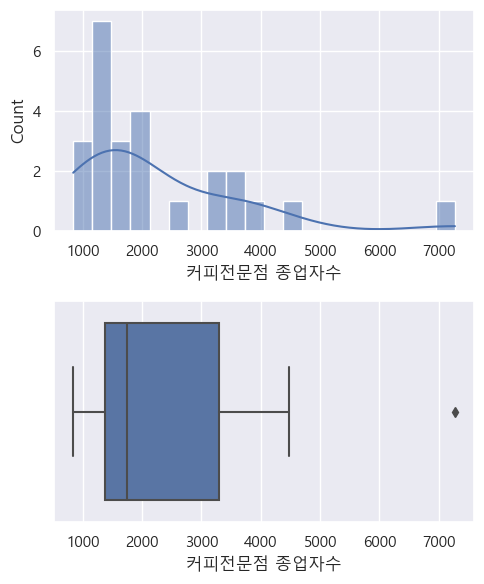

In [108]:
plt.figure(figsize=(5, 6))

plt.subplot(2, 1, 1)
sns.histplot(df['커피전문점 종업자수'], kde=True, bins=20)

plt.subplot(2, 1, 2)
sns.boxplot(x=df['커피전문점 종업자수'])

plt.tight_layout()
plt.show()

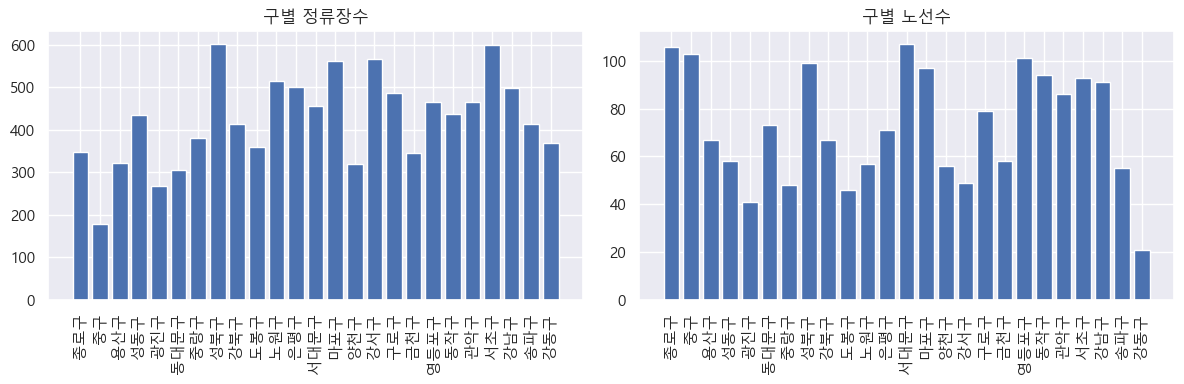

In [75]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(df['자치구'], df['정류장수'])
plt.xticks(rotation=90)
plt.title('구별 정류장수')

plt.subplot(1, 2, 2)
plt.bar(df['자치구'], df['노선수'])
plt.xticks(rotation=90)
plt.title('구별 노선수')

plt.tight_layout()
plt.show()

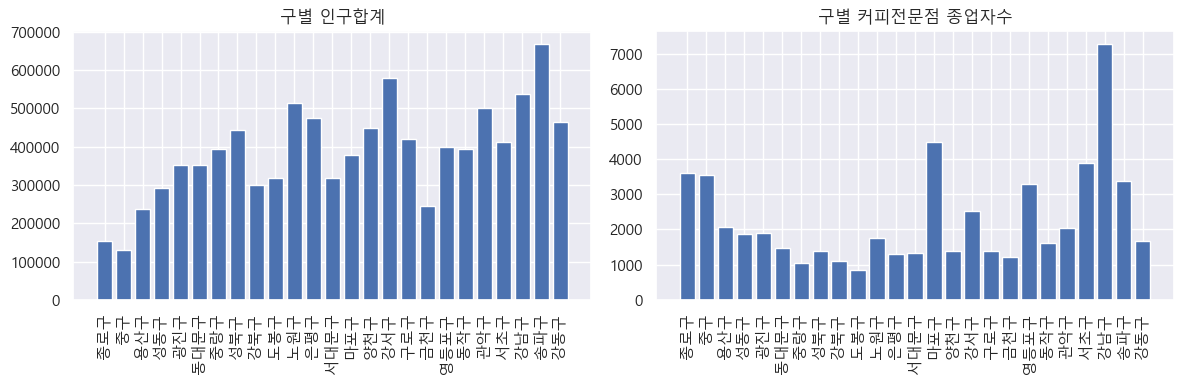

In [110]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(df['자치구'], df['인구합계'])
plt.xticks(rotation=90)
plt.title('구별 인구합계')

plt.subplot(1, 2, 2)
plt.bar(df['자치구'], df['커피전문점 종업자수'])
plt.xticks(rotation=90)
plt.title('구별 커피전문점 종업자수')

plt.tight_layout()
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


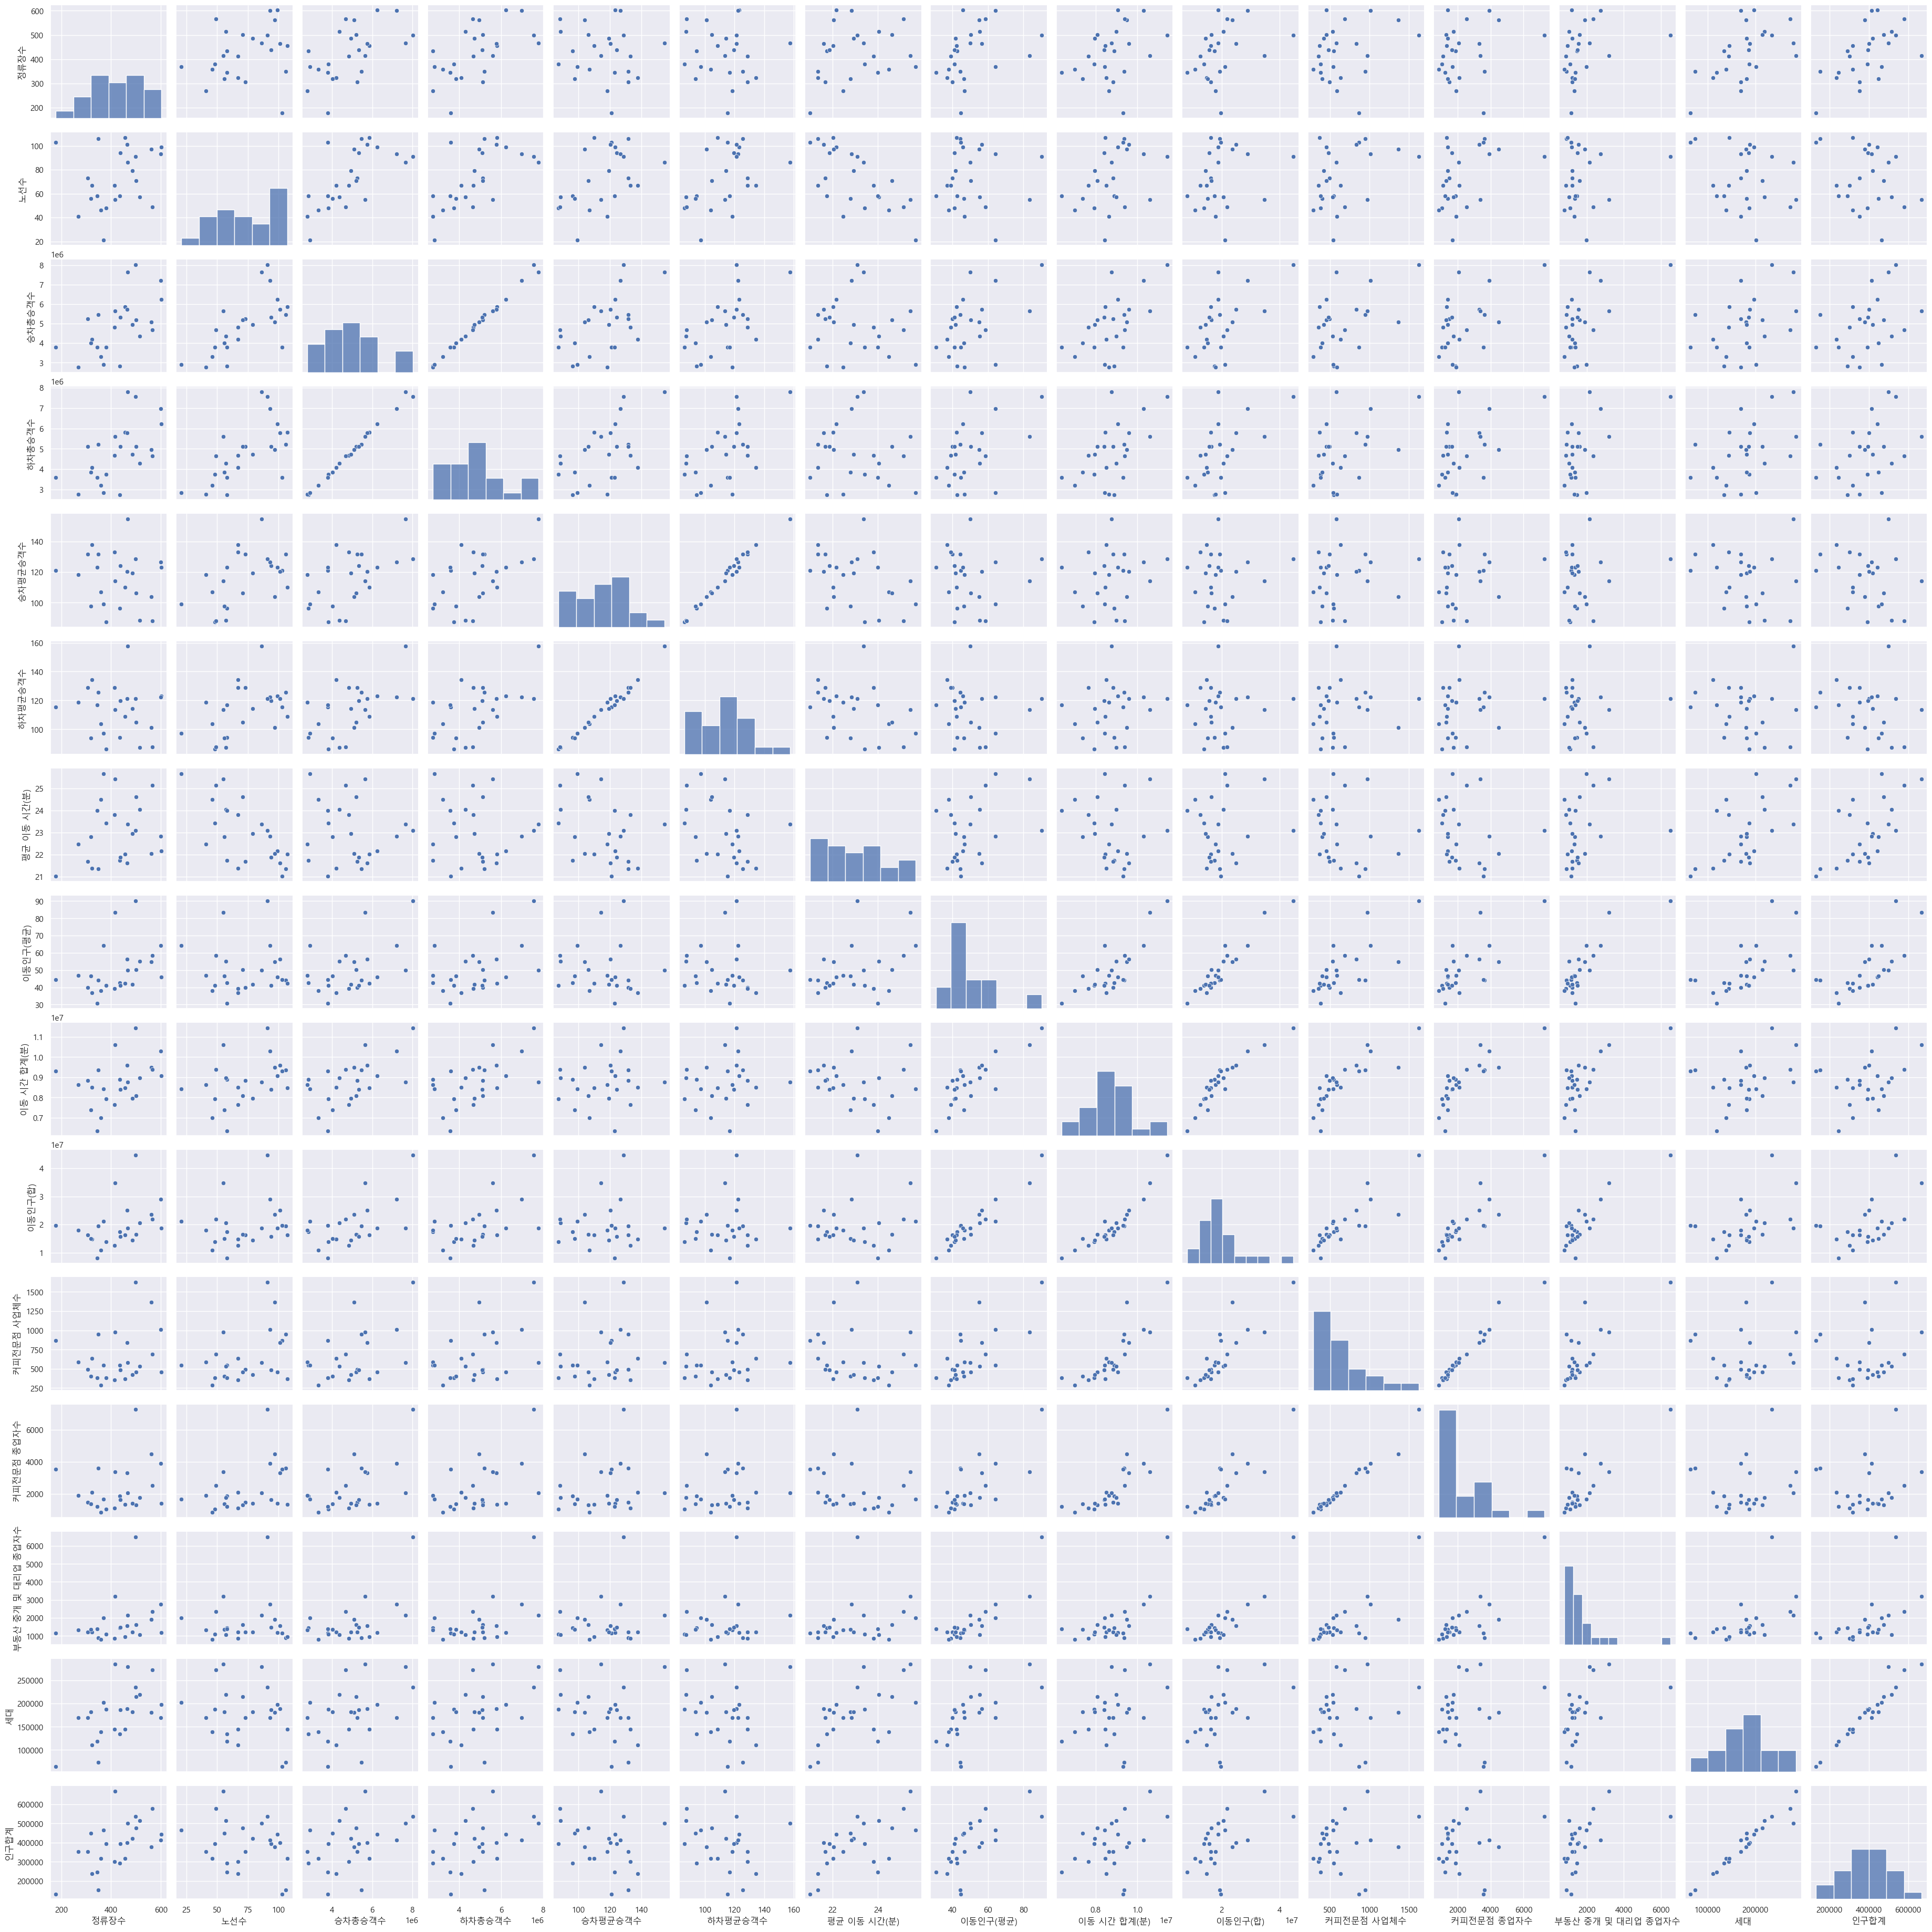

In [52]:
sns.pairplot(df)
plt.show()

In [53]:
import scipy.stats as spst

### 가설 1) 인구합계와 정류장 수는 관련이 있다.


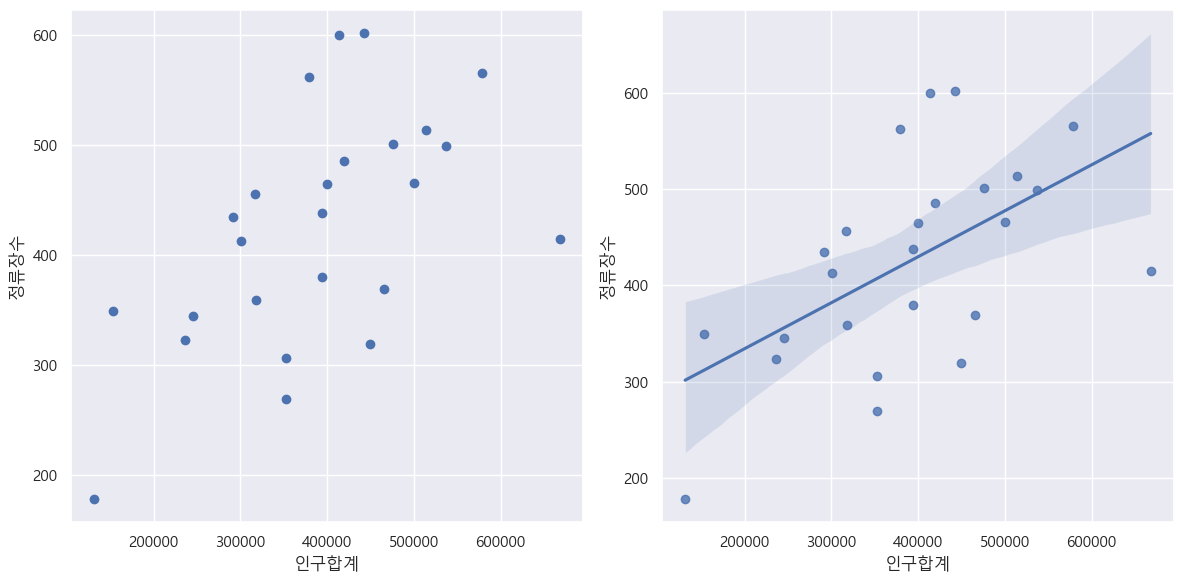

(0.5666148323603177, 0.003146292242946791)

In [82]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['인구합계'], df['정류장수'])
plt.xlabel('인구합계')
plt.ylabel('정류장수')

plt.subplot(1, 2, 2)
sns.regplot(x='인구합계', y='정류장수', data=df)

plt.tight_layout()
plt.show()

spst.pearsonr(df['인구합계'], df['정류장수'])

In [100]:
df.loc[df['인구합계'] > 600000]

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),...,커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수,세대,인구합계,정류장수/인구합계,노선수/평균 이동 시간(분),노선수/커피전문점 종업자수,노선수/커피전문점 사업체수,정류장수/승차총승객수
23,송파구,415,55,5641742,5603488,114.270072,113.49526,25.429707,83.493581,10610520,...,975,3372,3190,285106.0,668261.0,6.210148,21628.247249,163.107948,564.102564,0.735588


In [92]:
df['정류장수/인구합계'] = df['정류장수'] / df['인구합계'] * 10000
df[['자치구', '정류장수/인구합계']].sort_values(by=['정류장수/인구합계']).head()

,자치구,정류장수/인구합계
23,송파구,6.210148
14,양천구,7.098701
4,광진구,7.618023
24,강동구,7.933829
5,동대문구,8.678586


### 가설 2) 평균 이동시간과 노선수는 관련이 있다.

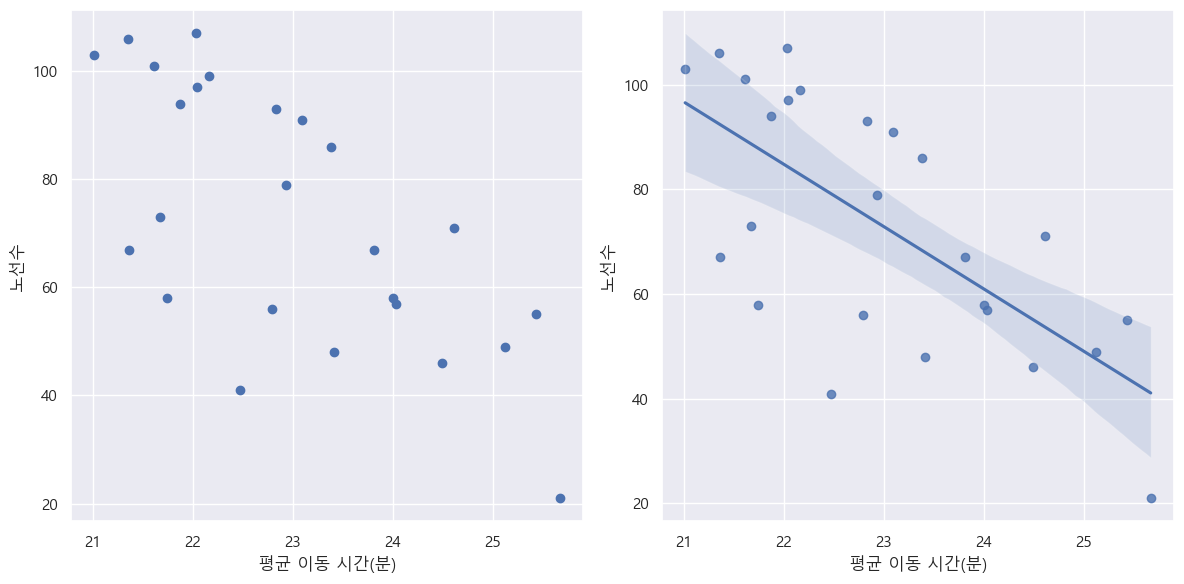

(-0.6786000547455109, 0.00019237294667152178)

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['평균 이동 시간(분)'], df['노선수'])
plt.xlabel('평균 이동 시간(분)')
plt.ylabel('노선수')

plt.subplot(1, 2, 2)
sns.regplot(x='평균 이동 시간(분)', y='노선수', data=df)

plt.tight_layout()
plt.show()

spst.pearsonr(df['평균 이동 시간(분)'], df['노선수'])

In [93]:
df['노선수/평균 이동 시간(분)'] = df['노선수'] / df['평균 이동 시간(분)'] * 10000
df[['자치구', '노선수/평균 이동 시간(분)']].sort_values(by=['노선수/평균 이동 시간(분)']).head()

,자치구,노선수/평균 이동 시간(분)
24,강동구,8180.728994
4,광진구,18243.073477
9,도봉구,18783.195252
15,강서구,19503.211011
6,중랑구,20501.616011


### 가설 3) 커피전문점 종업자(사업체) 수와 노선수는 관련이 있다.

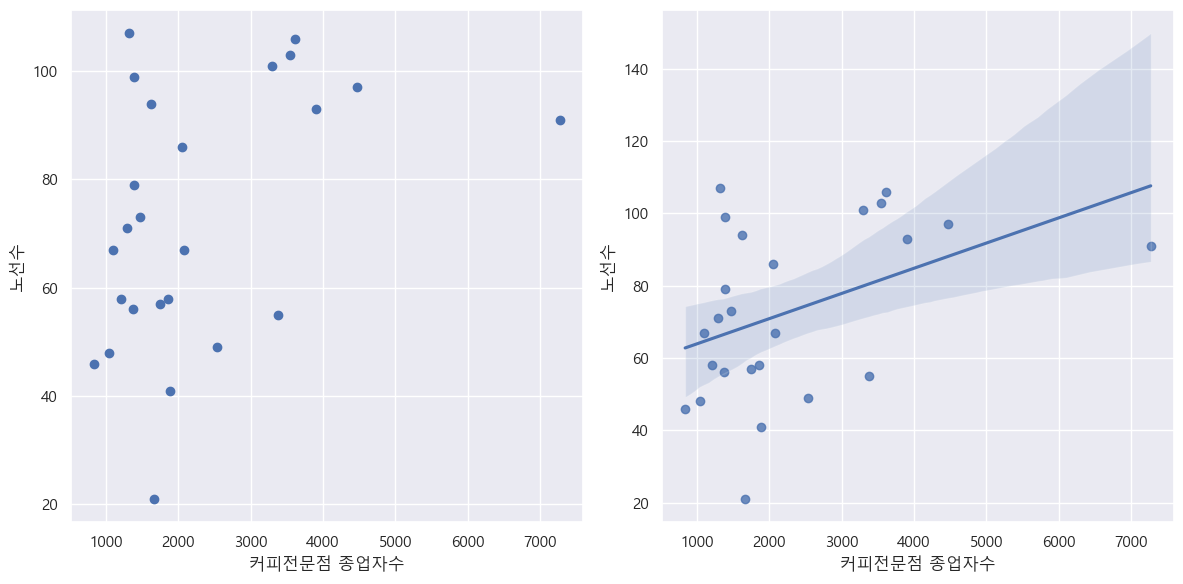

(0.42518048108643286, 0.03410811239601253)

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['커피전문점 종업자수'], df['노선수'])
plt.xlabel('커피전문점 종업자수')
plt.ylabel('노선수')

plt.subplot(1, 2, 2)
sns.regplot(x='커피전문점 종업자수', y='노선수', data=df)

plt.tight_layout()
plt.show()

spst.pearsonr(df['커피전문점 종업자수'], df['노선수'])

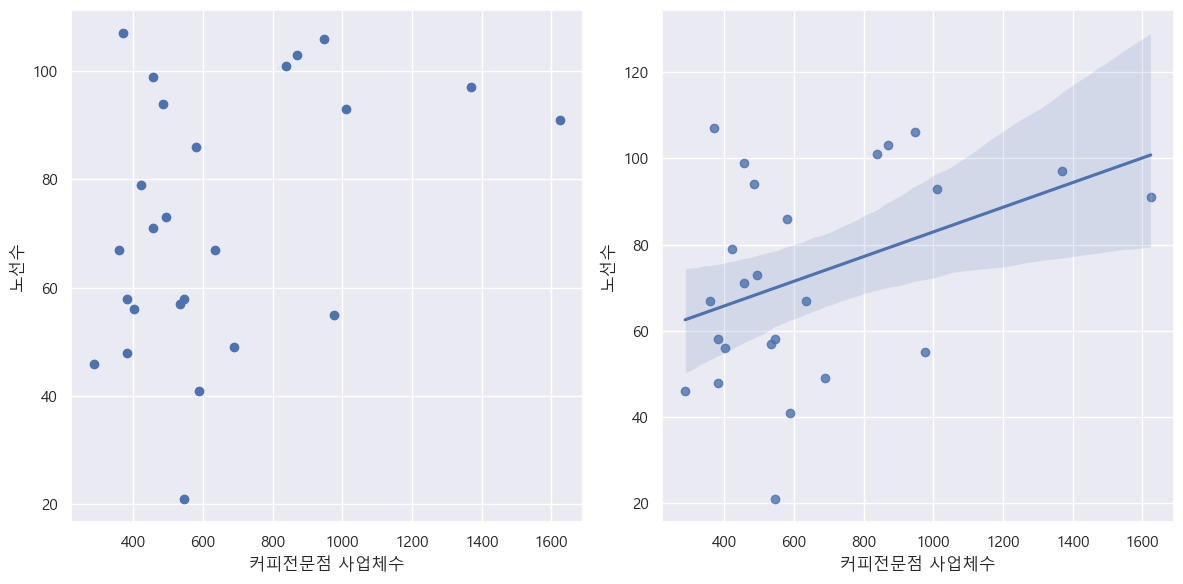

(0.39527392470061734, 0.05050405934174307)

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['커피전문점 사업체수'], df['노선수'])
plt.xlabel('커피전문점 사업체수')
plt.ylabel('노선수')

plt.subplot(1, 2, 2)
sns.regplot(x='커피전문점 사업체수', y='노선수', data=df)

plt.tight_layout()
plt.show()

spst.pearsonr(df['커피전문점 사업체수'], df['노선수'])

In [94]:
df['노선수/커피전문점 종업자수'] = df['노선수'] / df['커피전문점 종업자수'] * 10000
df[['자치구', '노선수/커피전문점 종업자수']].sort_values(by=['노선수/커피전문점 종업자수']).head()

,자치구,노선수/커피전문점 종업자수
22,강남구,125.120308
24,강동구,126.506024
23,송파구,163.107948
15,강서구,193.675889
13,마포구,216.759777


In [95]:
df['노선수/커피전문점 사업체수'] = df['노선수'] / df['커피전문점 사업체수'] * 10000
df[['자치구', '노선수/커피전문점 사업체수']].sort_values(by=['노선수/커피전문점 사업체수']).head()

,자치구,노선수/커피전문점 사업체수
24,강동구,384.615385
22,강남구,560.344828
23,송파구,564.102564
4,광진구,694.915254
13,마포구,708.546384


### ++ 가설 자명한 것은 넣어야하지 않을까? -> 승차총승객수와 정류장수

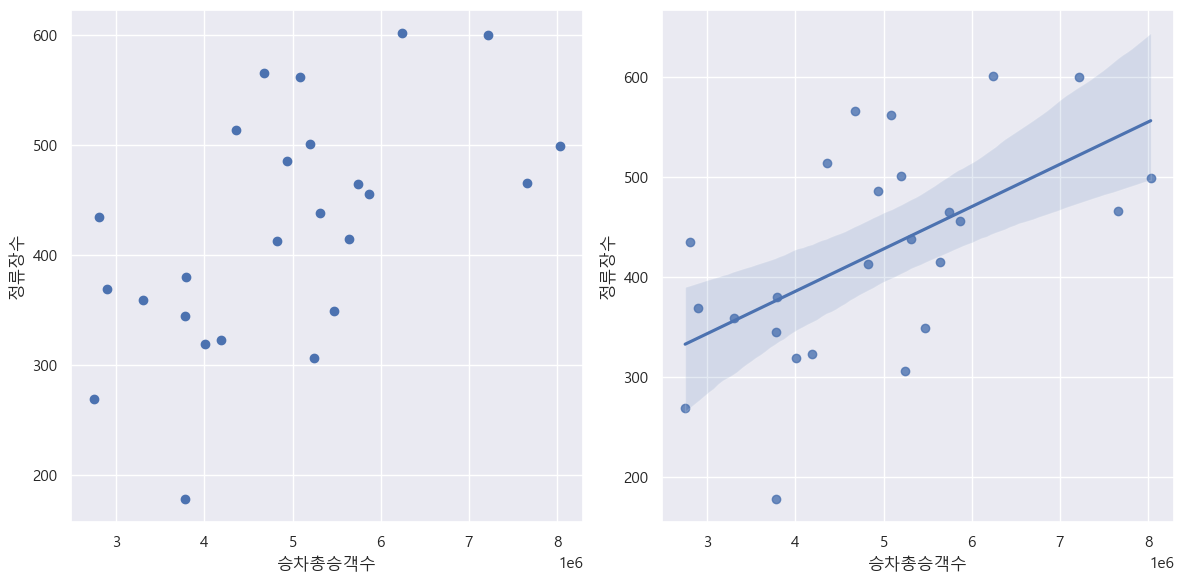

(0.5666813370974585, 0.003141977397117322)

In [96]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['승차총승객수'], df['정류장수'])
plt.xlabel('승차총승객수')
plt.ylabel('정류장수')

plt.subplot(1, 2, 2)
sns.regplot(x='승차총승객수', y='정류장수', data=df)

plt.tight_layout()
plt.show()

spst.pearsonr(df['승차총승객수'], df['정류장수'])

In [97]:
df['정류장수/승차총승객수'] = df['정류장수'] / df['승차총승객수'] * 10000
df[['자치구', '정류장수/승차총승객수']].sort_values(by=['정류장수/승차총승객수']).head()

,자치구,정류장수/승차총승객수
1,중구,0.471314
5,동대문구,0.583907
20,관악구,0.608687
22,강남구,0.621382
0,종로구,0.638150


### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



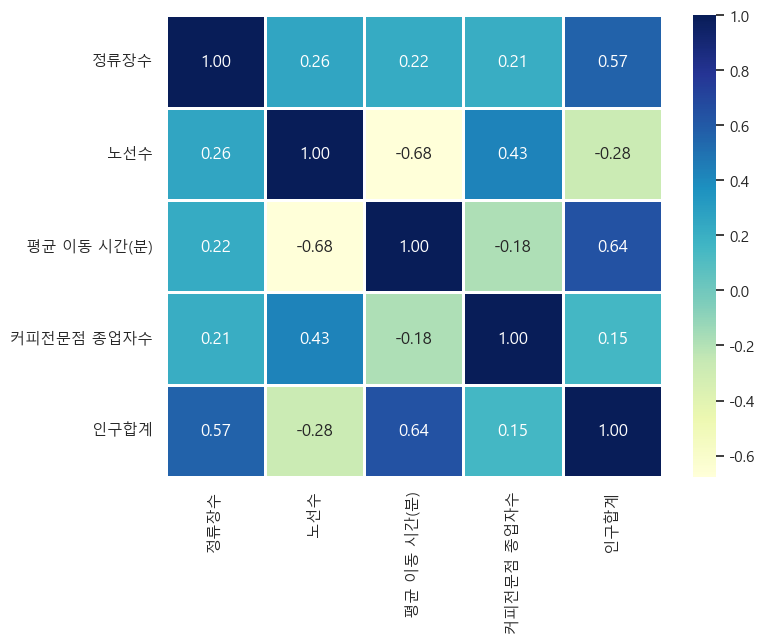

In [109]:
cols = ['정류장수', '노선수', '평균 이동 시간(분)', '커피전문점 종업자수', '인구합계']
corr = df[cols].corr()

plt.subplots(figsize=(8,6))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap="YlGnBu", fmt='.2f')
plt.show()

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

강남구, 강동구, 중구, 송파구